In [12]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [13]:
k, l, x0, y0, t = sp.symbols('k, l, x0, y0, t')

In [14]:
def beta_x0_min_1(k, l, x0):
    return (k*x0/l - 1.0)

In [15]:
def rad_q(k, l, x0, y0):
    beta = k/l
    arg =  beta_x0_min_1(k, l, x0)**2 + 2.0*x0*y0*beta**2
    return sp.sqrt(arg)

In [16]:
def phi(k, l, x0, y0):
    arg = beta_x0_min_1(k, l, x0) / rad_q(k, l, x0, y0)
    return 1.0/sp.tanh(arg)

In [32]:
def z(params, t):
    k, l, x0, y0 = params
    inv_beta = l/k
    arg_tanh = 0.5*l*t*rad_q(k, l, x0, y0) - phi(k, l, x0, y0)
    arg_1 = beta_x0_min_1(k, l, x0)
    arg_2 = rad_q(k, l, x0, y0)*sp.tanh(arg_tanh)
    z = (inv_beta**2)/x0*(arg_1 + arg_2)
#     z = (arg_1 + arg_2)
    return z

In [33]:
def x(params, t):
    k, l, x0, y0 = params
    exp_arg = -k/l*z(params, t)
    x = x0*sp.exp(exp_arg)
    return x

In [34]:
f_z = sp.lambdify(([k, l, x0, y0], t), z([k, l, x0, y0], t), "numpy")
f_x = sp.lambdify(([k, l, x0, y0], t), x([k, l, x0, y0], t), "numpy")

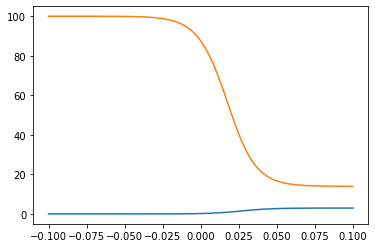

In [35]:
params = (1.0, 1.5, 100.0, 0.0)
times = np.linspace(-0.1, 0.1, 100)
plt.plot(times,f_z(params, times))
plt.plot(times,f_x(params, times))